> ### Note on Labs and Assigments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 4: Data Understanding

## Outline

- Load and preview a real-world dataset
- Inspect structure and identify missing or unusual data
- Perform basic grouped summaries

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_04_data_understanding.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any questions about Colab, you can read more here:  
https://research.google.com/colaboratory/faq.html


## Dataset Overview

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     |  Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1). |
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Data

### Instructions:
- Import the `pandas` library.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [2]:
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


### 🔧 Try It Yourself – Part 1

1. Add one line of code to print the number of rows and columns.

(200796, 17)


## Part 2: Inspecting, Cleaning & Removing Outliers

### Instructions:
- Identify missing values.
- Check data types are correct(e.g., dates, numeric columns).
- Check for outliers key numeric variables like `price`, `sqft`, `beds`, or `baths`.

### Think about:
- Are there missing values?
- Do the data types look appropriate?
- Do any numeric variables contain extreme or unusual values?



In [4]:
# Check for missing values
df.isnull().sum()

,0
post_id,0
date,0
year,0
nhood,0
city,0
county,1394
price,0
beds,6608
baths,158121
sqft,136117


In [5]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,200796.000000,194188.000000,42675.000000,64679.000000
mean,2135.362746,1.889025,1.679086,1201.827688
std,1427.747903,1.079138,0.690509,5000.217864
min,220.000000,0.000000,1.000000,80.000000
25%,1295.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2505.000000,3.000000,2.000000,1360.000000
max,40000.000000,12.000000,8.000000,900000.000000


In [6]:
# Check data types
df.dtypes

,0
post_id,object
date,int64
year,int64
nhood,object
city,object
county,object
price,int64
beds,float64
baths,float64
sqft,float64


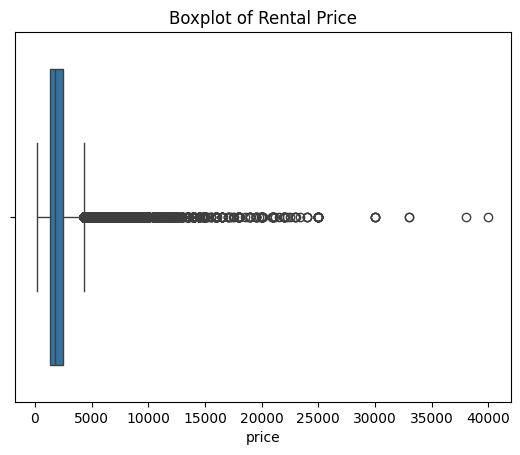

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of price
sns.boxplot(x=df['price'])
plt.title("Boxplot of Rental Price")
plt.show()

In [15]:
# Remove price outliers (1st–99th percentile)
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)
df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

### 🔧 Try It Yourself – Part 2

1. Use `.describe()` and a boxplot to check for outliers in **square footage (`sqft`)**.

2. What patterns or issues do you see with square footage values? Is there anything unusual?


count     56345.000000
mean       1101.774727
std        5330.933259
min          80.000000
25%         731.000000
50%         955.000000
75%        1242.000000
max      900000.000000
Name: sqft, dtype: float64


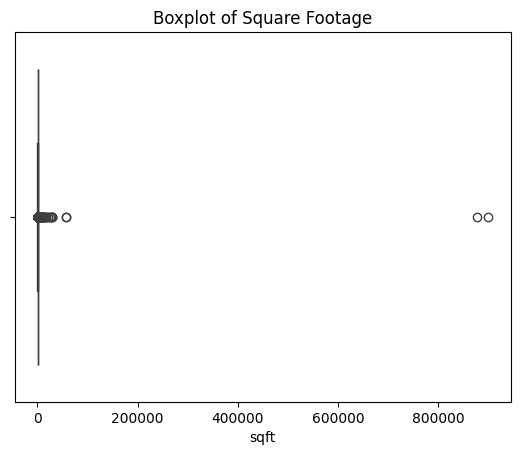

This data looks like it has some VERY extreme outliers that are skewing the data. There look to be two values that are extremely high. I feel like this could be bad data.


## Part 3: Basic Exploration

Use `groupby` and `value_counts` to summarize trends across neighborhoods and cities.


In [17]:
# Average price by neighborhood
df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)

,price
nhood,
candlestick point,2973.601770
forest knolls,2861.666667
SOMA / south beach,2798.091037
cazadero,2700.000000
financial district,2690.951754
tiburon / belvedere,2595.725714
half moon bay,2530.210191
larkspur,2403.523810
saratoga,2402.731278


In [18]:
# Top cities by count
df['city'].value_counts().head(10)

,count
city,
san francisco,46253
san jose,12584
oakland,7896
santa rosa,5679
santa cruz,4923
san mateo,4838
sunnyvale,4214
mountain view,4053
santa clara,3917


### 🔧 Try It Yourself – Part 3

Explore the data by performing both of the following:

1. Group the listings by `year` and calculate the average price for each year.
2. Use `.value_counts()` on the `room_in_apt` column to see how common room rentals are.

3. Add a short comment or markdown cell describing any trends or insights you found.


year
2000    1703.235294
2001    1934.098385
2002    1677.083333
2003    1581.397733
2004    1641.093134
2005    1536.726623
2006    1701.157541
2007    1878.392548
2008    1861.627086
2009    1791.696732
2010    1736.182917
2011    1886.262565
2012    1921.077859
2013    2184.510092
2014    2331.899769
2015    2475.081555
2016    2445.152260
2017    2577.063085
2018    2495.865645
Name: price, dtype: float64


In [20]:
# Use .value_counts() on room_in_apt
room_rental_counts = df['room_in_apt'].value_counts()
print(room_rental_counts)

room_in_apt
0    176455
1       198
Name: count, dtype: int64


It is obvious that there is an increase in rent prices over the years, which is to be expected. It looks like they sharply dropped between 2001-2002, and they also dropped between 2008-2009. These were bad recession years. In general, they are rising. Only 198 listings were for single rooms within apartments, which is interesting. I would expect this figure to be higher.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [21]:
!jupyter nbconvert --to html "lab_04_data_understanding.ipynb"

[NbConvertApp] Converting notebook lab_04_data_understanding.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 353411 bytes to lab_04_data_understanding.html
